In [1]:
import pandas as pd
from collections import Counter
import itertools

# Load data hasil preprocessing
df = pd.read_csv("../data/dataset_clean.csv")


### Analisis Statistik

In [2]:
df['judul_len'] = df['Judul_clean'].apply(lambda x: len(x.split()))
df['keyword_len'] = df['Keyword_clean'].apply(lambda x: len(x.split()))
df['abstrak_len'] = df['Abstrak_clean'].apply(lambda x: len(x.split()))

df[['judul_len', 'keyword_len', 'abstrak_len']].describe()

,judul_len,keyword_len,abstrak_len
count,730.000000,730.000000,730.000000
mean,13.046575,8.272603,115.390411
std,3.530859,4.084289,52.484366
min,4.000000,1.000000,1.000000
25%,11.000000,6.000000,107.000000
50%,13.000000,8.000000,129.000000
75%,15.000000,11.000000,145.750000
max,26.000000,39.000000,271.000000


In [3]:
#FREKUENSI KATA
all_words = list(itertools.chain(*df['Abstrak_clean'].str.split()))
word_freq = Counter(all_words)

word_freq.most_common(10)

[('guna', 2594),
 ('hasil', 1485),
 ('teliti', 1445),
 ('uji', 1015),
 ('sistem', 956),
 ('data', 875),
 ('laku', 873),
 ('tingkat', 871),
 ('metode', 709),
 ('aplikasi', 663)]

### Visualisasi

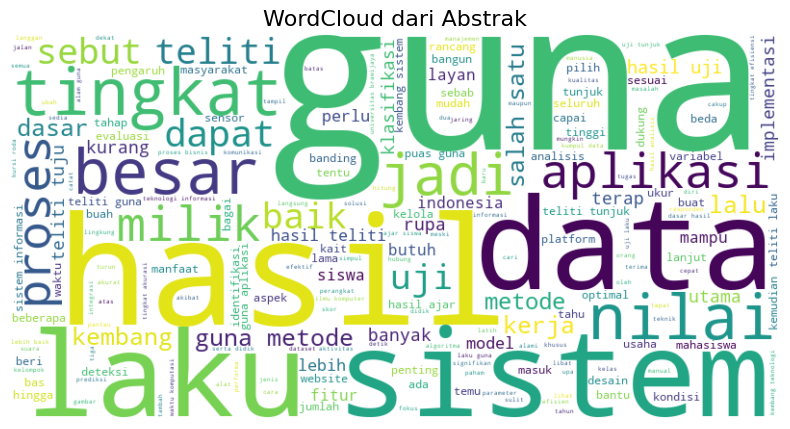

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(df['Abstrak_clean'])

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Abstrak", fontsize=16)
plt.show()


### TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF pada kolom Abstrak_clean
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['Abstrak_clean'])

print("Shape TF-IDF matrix:", tfidf_matrix.shape)


Shape TF-IDF matrix: (730, 1000)
